# Imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Functions

In [2]:
def groupby_min(df, dur):
    temp = df.copy()
    temp.index = map(lambda x: pd.datetime.combine(datetime.datetime.today()
                                                   , x), temp.index.time)
    return temp.resample(dur).mean()

def plot_camera_avg(df, cam=None, dur="1Min"):
    if cam == None:
        weekday = groupby_min(df[(df.index.weekday < 5) & 
                                 (df.index != "2017-07-04")], dur)
        weekend = groupby_min(df[(df.index.weekday >= 5)], dur)
        july4 = groupby_min(df[(df.index > "2017-07-04") & 
                               (df.index < "2017-07-05")], dur)
    else:
        weekday = groupby_min(df[(df.index.weekday < 5) & 
                                 (df.cam_id == cam) & 
                                 (df.index != "2017-07-04")], dur)
        weekend = groupby_min(df[(df.index.weekday >= 5) & 
                                 (df.cam_id == cam)], dur)
        july4 = groupby_min(df[(df.index > "2017-07-04") & 
                               (df.index < "2017-07-05") & 
                               (df.cam_id == cam)], dur)

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
    
    july4["count"].plot(ax=ax1, c="r", alpha=0.4, label="July 4th")
    weekday["count"].plot(ax=ax1, c="k", alpha=0.5, label="Weekday")
    weekend["count"].plot(ax=ax1, c="b", alpha=0.5, label="Weekend")

    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax1.grid(True, which="both")
    ax1.tick_params(axis="both", which="both", labelsize=12)
    ax1.legend(ncol=3, fontsize=12)
    
    return fig, ax1

# Load Data

In [3]:
df = pd.read_csv("../data/external/hadive-data.csv",
                 usecols=["cam_id", "date", "cam_dir", "count", "imtime"],
                 dtype={"cam_id": int, "date": str, "cam_dir": str, 
                        "count": int, "imtime": str}, parse_dates=["date"], 
                 infer_datetime_format=True, index_col="date")

print df.dtypes
df.head(2)

cam_id      int64
cam_dir    object
count       int64
imtime     object
dtype: object


,cam_id,cam_dir,count,imtime
date,,,,
2017-06-27 20:09:22,368,S,1,NaN
2017-06-27 20:09:23,360,NaN,1,NaN


In [4]:
cams = pd.read_csv("../data/external/cameras.csv")
cams.head(2)

,cam_id,cctv_id,description,lat,long,people,ribbon,boro,zipcode
0,112,83,SIE @ Richmond Ave,40.614885,-74.157435,0.0,1.0,Staten Island,10314
1,121,129,LIE @ Kissena Blvd,40.738943,-73.815047,1.0,0.0,Queens,11367


# Cameras Average (Manhattan)

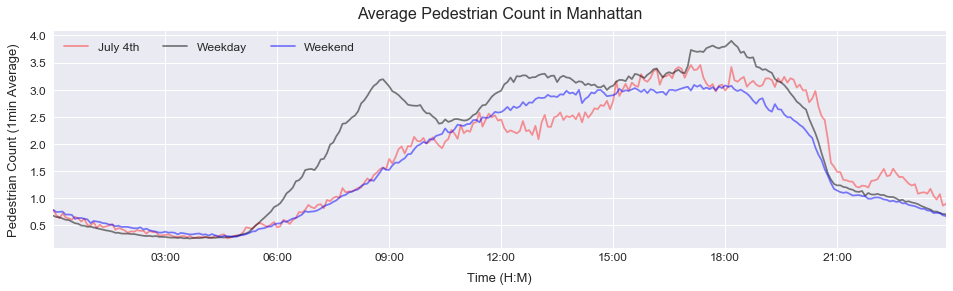

In [5]:
df_man = df[df["cam_id"].isin(cams[(cams["boro"] == "Manhattan") & 
                                   (cams["people"] == 1.)].cam_id.unique())]
fig, ax1 = plot_camera_avg(df_man, dur="5Min")
ax1.set_xlabel("Time (H:M)", fontsize=13, labelpad=10)
ax1.set_ylabel("Pedestrian Count (1min Average)", fontsize=13, labelpad=10)
ax1.set_title("Average Pedestrian Count in Manhattan", fontsize=16, y=1.03)

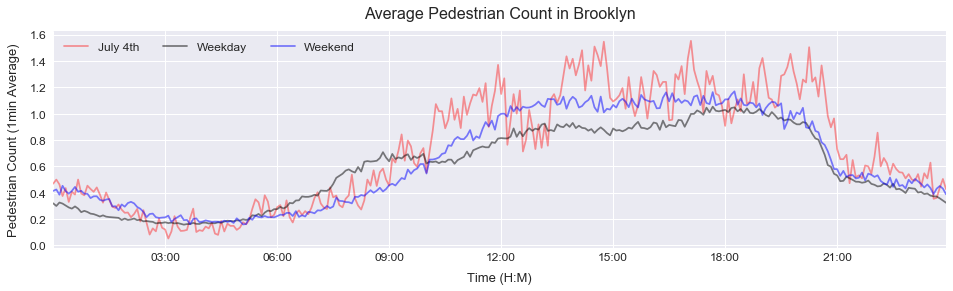

In [6]:
df_bk = df[df["cam_id"].isin(cams[(cams["boro"] == "Brooklyn") & 
                                   (cams["people"] == 1.)].cam_id.unique())]
fig, ax1 = plot_camera_avg(df_bk, dur="5Min")
ax1.set_xlabel("Time (H:M)", fontsize=13, labelpad=10)
ax1.set_ylabel("Pedestrian Count (1min Average)", fontsize=13, labelpad=10)
ax1.set_title("Average Pedestrian Count in Brooklyn", fontsize=16, y=1.03)

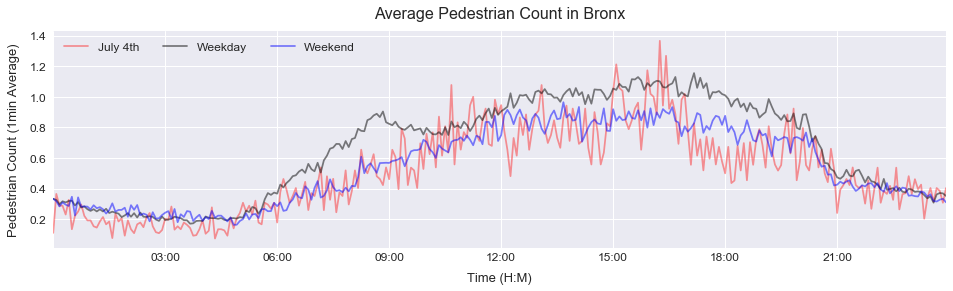

In [7]:
df_bx = df[df["cam_id"].isin(cams[(cams["boro"] == "Bronx") & 
                                   (cams["people"] == 1.)].cam_id.unique())]
fig, ax1 = plot_camera_avg(df_bx, dur="5Min")
ax1.set_xlabel("Time (H:M)", fontsize=13, labelpad=10)
ax1.set_ylabel("Pedestrian Count (1min Average)", fontsize=13, labelpad=10)
ax1.set_title("Average Pedestrian Count in Bronx", fontsize=16, y=1.03)

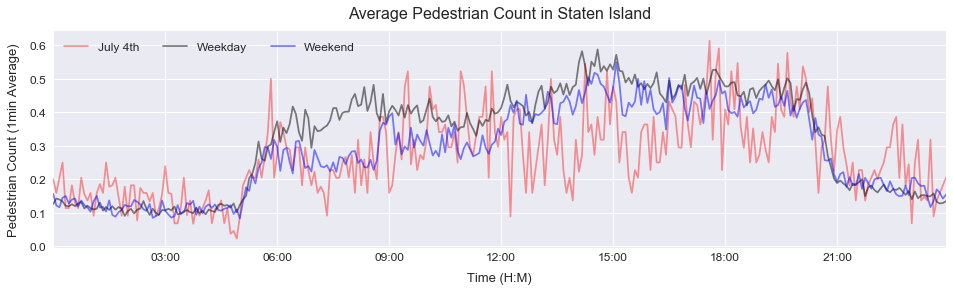

In [8]:
df_si = df[df["cam_id"].isin(cams[(cams["boro"] == "Staten Island") & 
                                   (cams["people"] == 1.)].cam_id.unique())]
fig, ax1 = plot_camera_avg(df_si, dur="5Min")
ax1.set_xlabel("Time (H:M)", fontsize=13, labelpad=10)
ax1.set_ylabel("Pedestrian Count (1min Average)", fontsize=13, labelpad=10)
ax1.set_title("Average Pedestrian Count in Staten Island", fontsize=16, y=1.03)

# Camera Average (Weekday, Weekend, and July 4th).

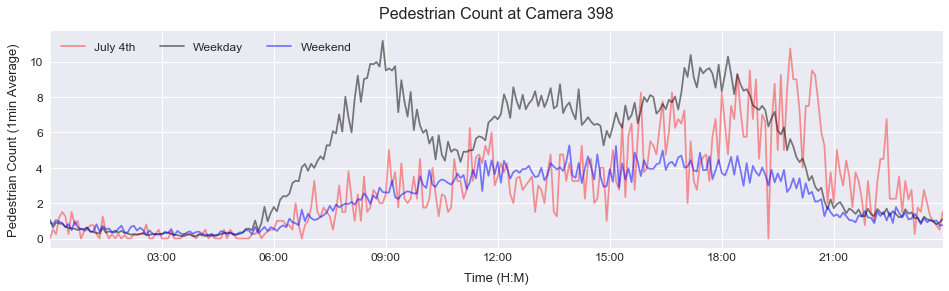

In [9]:
cam_id = 398 # Edit camera id here.
fig, ax1 = plot_camera_avg(df, cam_id, "5Min") 

ax1.set_xlabel("Time (H:M)", fontsize=13, labelpad=10)
ax1.set_ylabel("Pedestrian Count (1min Average)", fontsize=13, labelpad=10)
ax1.set_title("Pedestrian Count at Camera {}".format(cam_id), fontsize=16, y=1.03)